In [2]:
# Create project directory structure
import os

# Create directories
os.makedirs('notebooks', exist_ok=True)
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('utils', exist_ok=True)

print("Project structure created!")

Project structure created!


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Load dataset using ucimlrepo
from ucimlrepo import fetch_ucirepo 

print("Loading Heart Disease dataset...")
heart_disease = fetch_ucirepo(id=45) 

# Data (as pandas dataframes)
X = heart_disease.data.features 
y = heart_disease.data.targets

# Metadata
print("\nDataset Metadata:")
print(heart_disease.metadata)

# Variable information
print("\nVariable Information:")
print(heart_disease.variables)

Loading Heart Disease dataset...

Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',

In [10]:
# Explore the dataset
print("Dataset shape:", X.shape)
print("\nFirst 5 rows of features:")
print(X.head())

print("\nTarget variable distribution:")
print(y.value_counts())

print("\nMissing values in features:")
print(X.isnull().sum())

print("\nData types:")
print(X.dtypes)

Dataset shape: (303, 13)

First 5 rows of features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Target variable distribution:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

Missing values in features:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Data types:
age           int6

In [12]:
# Data preprocessing function
def preprocess_heart_disease(X, y):
    """
    Preprocess the Heart Disease dataset
    """
    # Create a copy
    df = X.copy()
    df['target'] = y
    
    # Convert target to binary (0: no disease, 1: disease)
    df['target'] = (df['target'] > 0).astype(int)
    
    print("Original dataset shape:", df.shape)
    print("Target distribution:")
    print(df['target'].value_counts())
    
    # Handle missing values
    print("\nMissing values before handling:")
    print(df.isnull().sum())
    
    # Check which columns have missing values and impute
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                # Numerical columns - use median
                df[col].fillna(df[col].median(), inplace=True)
                print(f"Filled missing values in {col} with median: {df[col].median()}")
            else:
                # Categorical columns - use mode
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"Filled missing values in {col} with mode: {df[col].mode()[0]}")
    
    # Separate features and target
    X_clean = df.drop('target', axis=1)
    y_clean = df['target']
    
    # Identify numerical and categorical features
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    
    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = X_clean.copy()
    X_scaled[numerical_features] = scaler.fit_transform(X_clean[numerical_features])
    
    # Ensure categorical features are integers
    for col in categorical_features:
        X_scaled[col] = X_scaled[col].astype(int)
    
    print(f"\nFinal dataset shape: {X_scaled.shape}")
    print("Missing values after preprocessing:", X_scaled.isnull().sum().sum())
    
    return X_scaled, y_clean, scaler, numerical_features, categorical_features



In [14]:
# Exploratory Data Analysis
def perform_eda(X, y):
    """Perform comprehensive EDA"""
    
    df_eda = X.copy()
    df_eda['target'] = y
    
    # 1. Basic statistics
    print("Dataset Overview:")
    print(f"Shape: {df_eda.shape}")
    print(f"Number of patients with heart disease: {y.sum()}")
    print(f"Number of patients without heart disease: {len(y) - y.sum()}")
    print(f"Prevalence of heart disease: {y.mean():.2%}")
    
    # 2. Correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_eda.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', square=True, cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 3. Target distribution
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    target_counts = y.value_counts()
    plt.pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%',
            colors=['lightcoral', 'lightblue'], startangle=90)
    plt.title('Heart Disease Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y)
    plt.title('Heart Disease Count')
    plt.xlabel('Heart Disease')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # 4. Numerical features distribution
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(numerical_features):
        if i < 6:  # Ensure we don't exceed subplot count
            axes[i].hist([df_eda[df_eda['target'] == 0][feature], 
                         df_eda[df_eda['target'] == 1][feature]], 
                        alpha=0.7, label=['No Disease', 'Disease'])
            axes[i].set_title(f'{feature} Distribution')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
            axes[i].legend()
    
    # Remove empty subplot
    if len(numerical_features) < 6:
        for i in range(len(numerical_features), 6):
            fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    # 5. Categorical features analysis
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(categorical_features):
        if i < 9:
            cross_tab = pd.crosstab(df_eda[feature], df_eda['target'])
            cross_tab.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{feature} vs Heart Disease')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            axes[i].legend(['No Disease', 'Disease'])
    
    # Remove empty subplots
    for i in range(len(categorical_features), 9):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    return df_eda

Original dataset shape: (303, 14)
Target distribution:
target
0    164
1    139
Name: count, dtype: int64

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Filled missing values in ca with median: 0.0
Filled missing values in thal with median: 3.0

Final dataset shape: (303, 13)
Missing values after preprocessing: 0
Dataset Overview:
Shape: (303, 14)
Number of patients with heart disease: 139
Number of patients without heart disease: 164
Prevalence of heart disease: 45.87%


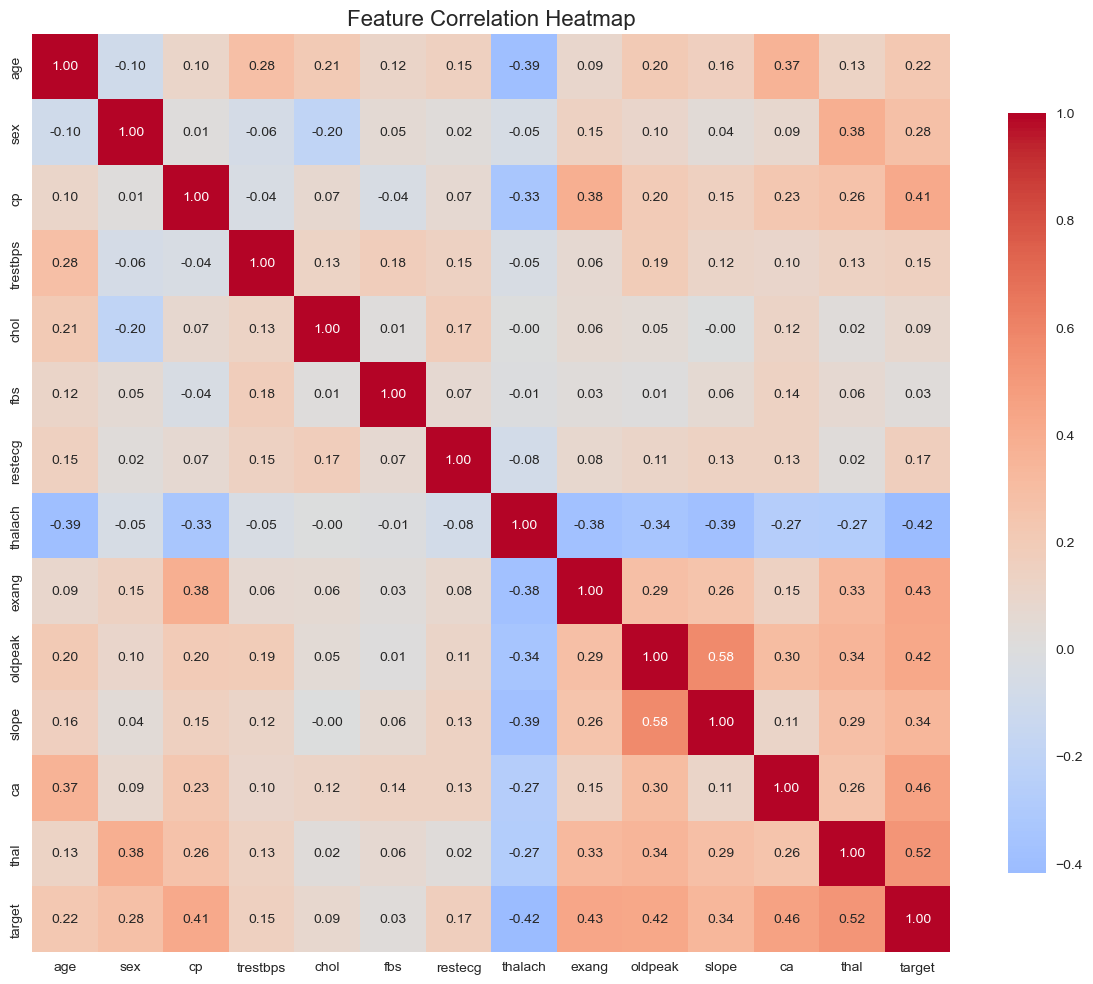

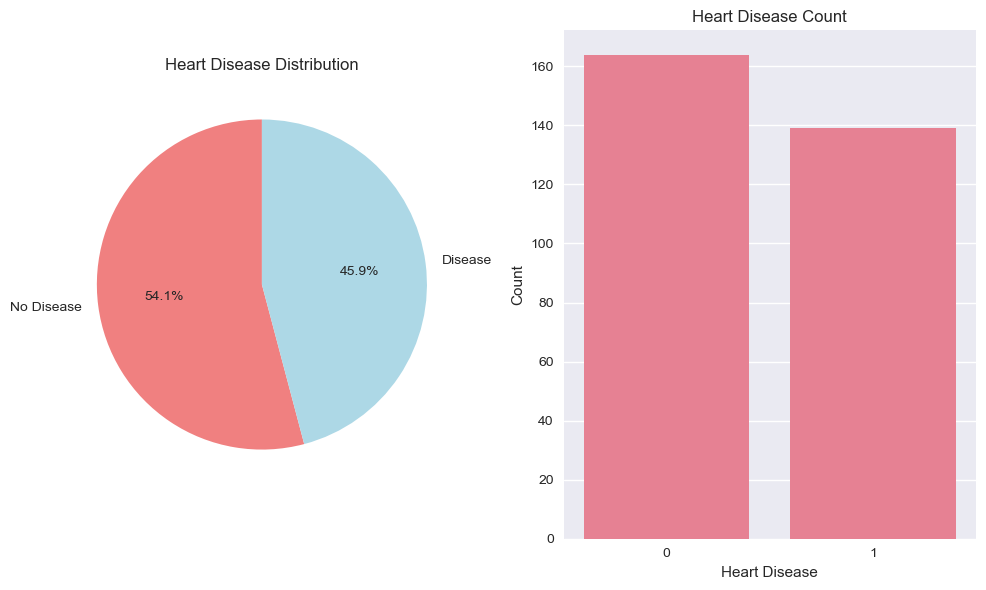

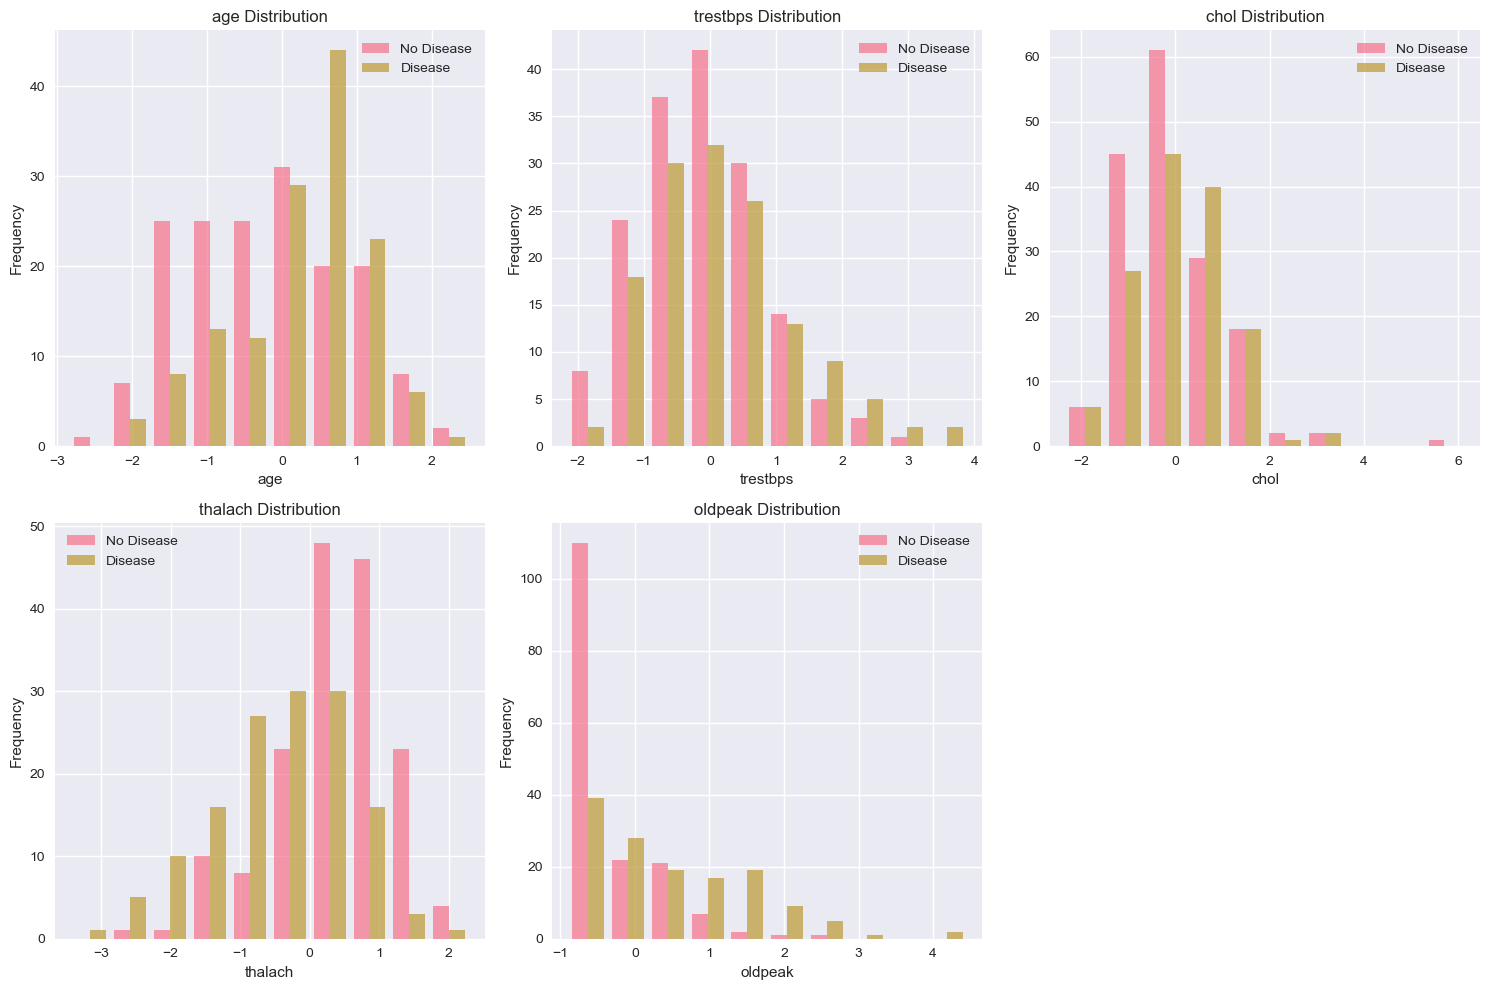

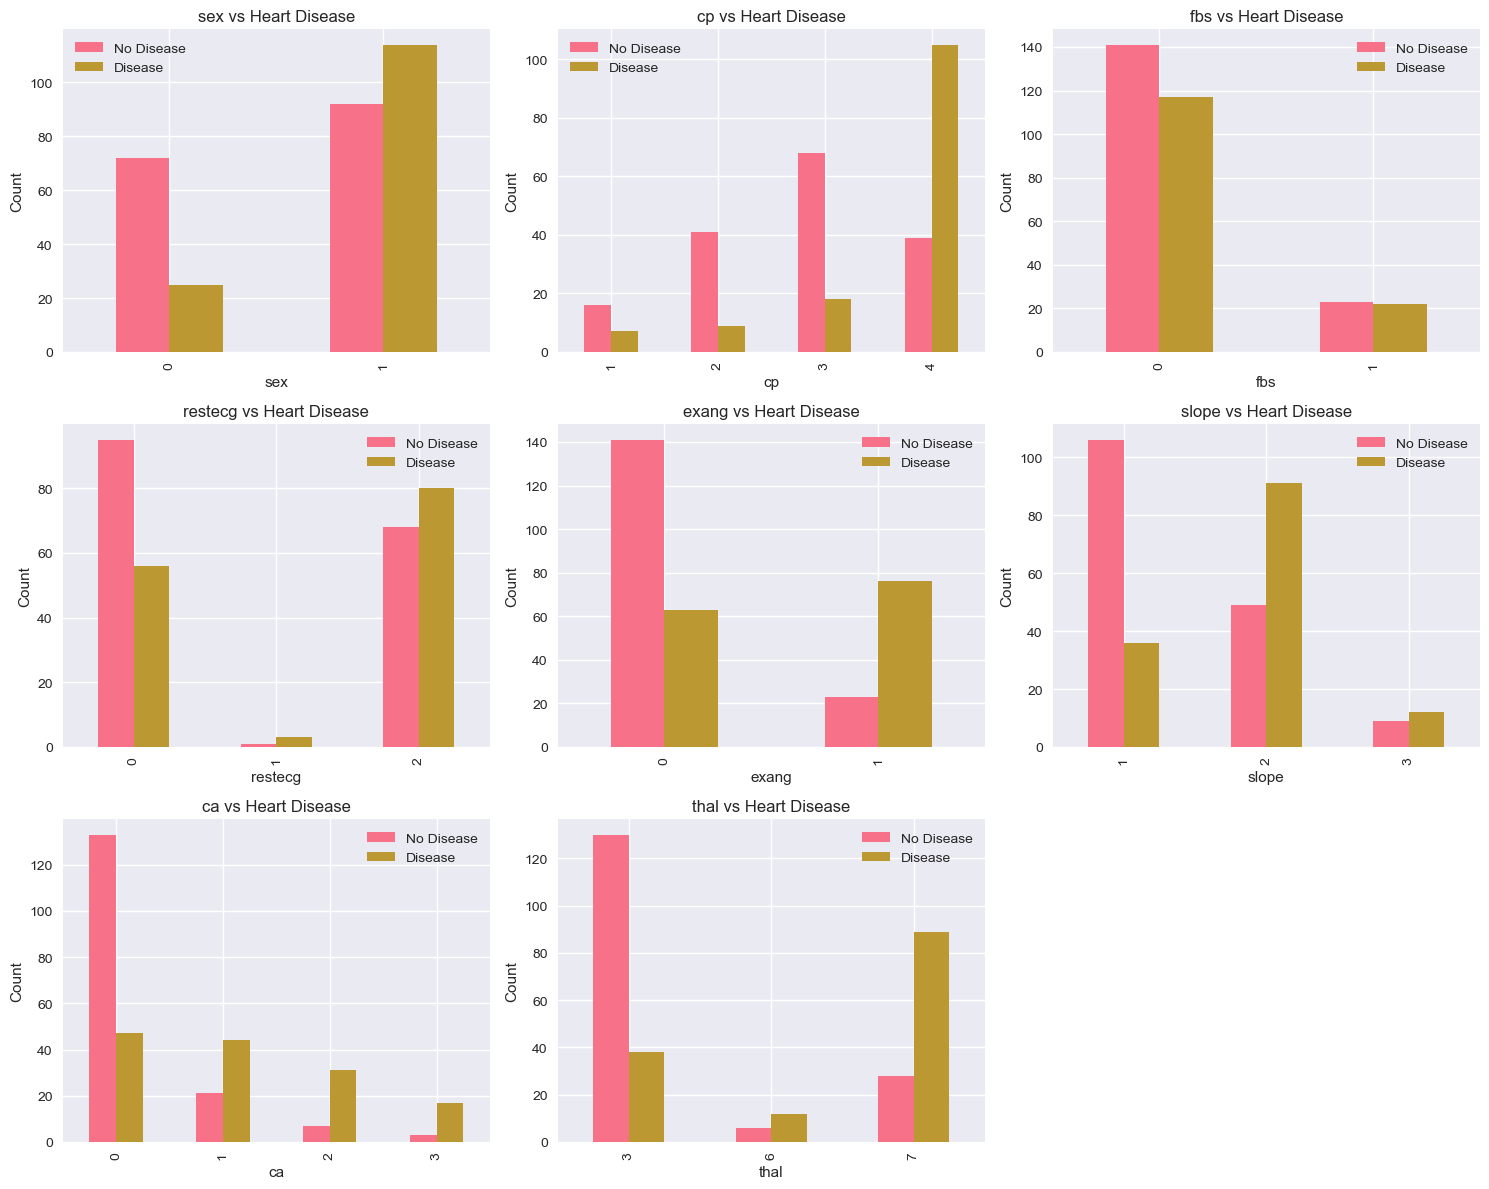

Data preprocessing completed and saved!
Cleaned features shape: (303, 13)
Target shape: (303,)


In [16]:
# Preprocess the data
X_clean, y_clean, scaler, numerical_features, categorical_features = preprocess_heart_disease(X, y)


# Perform EDA
df_eda = perform_eda(X_clean, y_clean)

# Save processed data
import joblib

# Save the cleaned data
X_clean.to_csv('data/heart_disease_cleaned_features.csv', index=False)
y_clean.to_csv('data/heart_disease_cleaned_target.csv', index=False)

# Save the scaler
joblib.dump(scaler, 'models/scaler.pkl')

# Save feature information
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features
}
joblib.dump(feature_info, 'models/feature_info.pkl')

print("Data preprocessing completed and saved!")
print(f"Cleaned features shape: {X_clean.shape}")
print(f"Target shape: {y_clean.shape}")

In [20]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# Combine features and target into one DataFrame
heart_disease_df = pd.concat([X, y], axis=1)

# Export main dataset
heart_disease_df.to_csv('heart_disease_dataset.csv', index=False)

# Export variable information
variables_df = heart_disease.variables
variables_df.to_csv('heart_disease_variable_info.csv', index=False)

print("Exports completed!")
print(f"Main dataset: 'heart_disease_dataset.csv' ({heart_disease_df.shape[0]} rows, {heart_disease_df.shape[1]} columns)")
print(f"Variable info: 'heart_disease_variable_info.csv'")

Exports completed!
Main dataset: 'heart_disease_dataset.csv' (303 rows, 14 columns)
Variable info: 'heart_disease_variable_info.csv'
